In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_excel('base_telecomunicacao.xlsx',sheet_name='Sheet1')

In [53]:
df.describe()

,Idade,Renda_Mensal,Uso_Internet,Satisfacao_Servico,Interesse_5G,Pessoas_Residencia,Gasto_Internet,Interesse_Combo,Atendimento_Recebido,Satisfacao_Geral
count,1905.000000,1939.000000,1924.000000,1907.000000,1883.000000,1965.000000,1914.000000,1899.000000,1924.000000,1904.000000
mean,43.622572,9626.135637,6.549376,5.668065,5.587892,4.837659,274.261233,5.499210,5.630457,5.597689
std,17.288482,9663.569508,3.377937,2.805975,2.788717,2.603774,114.884545,2.746465,2.827715,2.826553
min,5.000000,-500.000000,0.000000,0.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000
25%,31.000000,4342.000000,4.000000,4.000000,4.000000,3.000000,187.000000,4.000000,4.000000,4.000000
50%,43.000000,7662.000000,6.000000,6.000000,6.000000,4.000000,263.000000,6.000000,6.000000,6.000000
75%,56.000000,13689.500000,9.000000,8.000000,8.000000,7.000000,365.000000,7.000000,8.000000,8.000000
max,120.000000,100000.000000,15.000000,10.000000,10.000000,10.000000,500.000000,10.000000,10.000000,10.000000


In [54]:
df.dtypes

Ocupacao                   object
Idade                     float64
Cidade_Nascimento          object
Dispositivos               object
Renda_Mensal              float64
Uso_Internet              float64
Troca_Celular              object
Satisfacao_Servico        float64
Operadora_Celular          object
Interesse_5G              float64
Assistencia_TV             object
Preferencia_Compra         object
Pessoas_Residencia        float64
Gasto_Internet            float64
Plano_Preferencia          object
Conhecimento_IoT           object
Interesse_Combo           float64
Regiao                     object
Uso_Internet_5h            object
Genero                     object
Plano_Atual                object
Dispositivo_Utilizado      object
Plano_5G                   object
Motivo_Troca               object
Trabalho_Remoto            object
Possui_Plano_Telefonia     object
Servicos_Streaming         object
Prioridade_Plano           object
Pagar_Velocidade           object
Atendimento_Re

Limpeza dos dados

In [56]:

df.loc[df['Ocupacao'] == 'XYZ123', 'Ocupacao'] = np.nan

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('sp', 'São Paulo')

df['Cidade_Nascimento'] = df['Cidade_Nascimento'].replace('São paulo', 'São Paulo')
df.loc[df['Dispositivos'] == 'Mu', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == 'na', 'Dispositivos'] = np.nan
df.loc[df['Dispositivos'] == '-1', 'Dispositivos'] = np.nan

df.loc[df['Operadora_Celular'] == '123', 'Operadora_Celular'] = np.nan
df.loc[df['Operadora_Celular'] == 'indef', 'Operadora_Celular'] = np.nan
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('ambos', 'Indiferente')
df['Preferencia_Compra'] = df['Preferencia_Compra'].replace('não sei', 'Indiferente')
df.loc[df['Plano_Preferencia'] == '?', 'Plano_Preferencia'] = np.nan
df.loc[df['Uso_Internet_5h'] == '?', 'Uso_Internet_5h'] = np.nan
df.loc[df['Servicos_Streaming'] == 'Não sei', 'Servicos_Streaming'] = np.nan
df.loc[df['Servicos_Streaming'] == '-', 'Servicos_Streaming'] = np.nan
df.loc[df['Plano_Familiar'] == '?', 'Plano_Familiar'] = np.nan

df.loc[df['Troca_Celular'] == '?', 'Troca_Celular'] = np.nan

In [57]:
import numpy as np

# Definir o limite de caracteres
limite_caracteres = 1000

# Remover textos longos (com mais de 1000 caracteres) e substituir por NaN
df['Conhecimento_IoT'] = df['Conhecimento_IoT'].apply(
    lambda x: np.nan if isinstance(x, str) and len(x) > limite_caracteres else x
)


print(df['Conhecimento_IoT'].value_counts(dropna=False))


Conhecimento_IoT
NaN     3015
5.0      283
6.0      251
7.0      247
4.0      237
0.0      156
1.0      155
2.0      144
3.0      141
8.0      104
9.0      103
10.0      92
Name: count, dtype: int64


In [58]:
df_escolhidos = df[['Ocupacao', 'Idade', 'Renda_Mensal', 'Gasto_Internet', 'Regiao', 'Genero', 'Plano_Atual', 'Motivo_Troca']]
df_escolhidos.head()


,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
0,NaN,60.0,5681.0,368.0,Sudeste,Feminino,Basico,Preco Alto
1,NaN,21.0,6172.0,NaN,NaN,Masculino,Basico,NaN
2,NaN,21.0,NaN,NaN,NaN,Feminino,NaN,Atendimento Ruim
3,NaN,34.0,3782.0,394.0,NaN,NaN,Basico,Atendimento Ruim
4,NaN,NaN,NaN,339.0,Nordeste,Masculino,Basico,NaN


In [59]:
df_escolhidos.describe()

,Idade,Renda_Mensal,Gasto_Internet
count,1905.000000,1939.000000,1914.000000
mean,43.622572,9626.135637,274.261233
std,17.288482,9663.569508,114.884545
min,5.000000,-500.000000,51.000000
25%,31.000000,4342.000000,187.000000
50%,43.000000,7662.000000,263.000000
75%,56.000000,13689.500000,365.000000
max,120.000000,100000.000000,500.000000


In [66]:
#Nao esquecer de calcular a corr geral antes e depois 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_corr = df_escolhidos.copy()
# Identificar as colunas do tipo 'object'
object_columns = df_corr.select_dtypes(include=['object']).columns

# Criar uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada coluna de tipo 'object'
for col in object_columns:
    # Substituir NaN por um valor, como 'missing'
    df_corr[col] = df_corr[col].fillna('missing')

    df_corr[col] = df_corr[col].astype(str)
    
    # Aplicar o LabelEncoder
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Ver o dataframe modificado
df_corr=df_corr.corr()
df_corr

,Ocupacao,Idade,Renda_Mensal,Gasto_Internet,Regiao,Genero,Plano_Atual,Motivo_Troca
Ocupacao,1.000000,NaN,NaN,NaN,-0.537146,-0.602581,-0.574123,-0.552011
Idade,NaN,1.000000,-0.022034,0.068811,-0.028130,-0.028166,-0.013813,-0.016083
Renda_Mensal,NaN,-0.022034,1.000000,0.024931,-0.053825,-0.009626,0.037015,-0.014633
Gasto_Internet,NaN,0.068811,0.024931,1.000000,0.013842,-0.001833,-0.004599,-0.063732
Regiao,-0.537146,-0.028130,-0.053825,0.013842,1.000000,0.536254,0.492750,0.486335
Genero,-0.602581,-0.028166,-0.009626,-0.001833,0.536254,1.000000,0.561952,0.545480
Plano_Atual,-0.574123,-0.013813,0.037015,-0.004599,0.492750,0.561952,1.000000,0.490622
Motivo_Troca,-0.552011,-0.016083,-0.014633,-0.063732,0.486335,0.545480,0.490622,1.000000


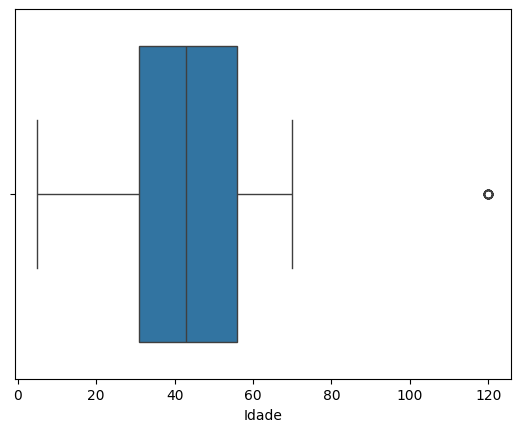

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()

/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/791149785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(120,70)
/var/folders/53/jx83wpkx7hgdbvxfpv0hmf8w0000gq/T/ipykernel_24384/791149785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(5,18)


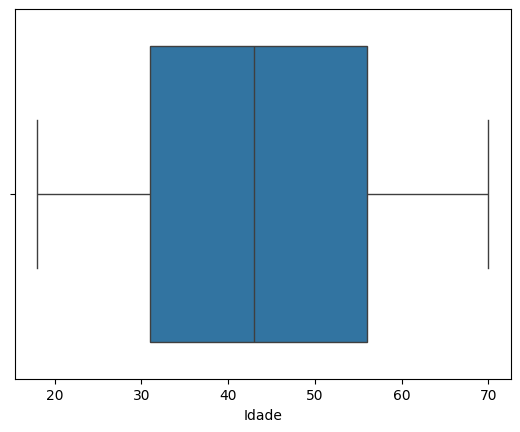

In [65]:
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(120,70)
df_escolhidos['Idade'] = df_escolhidos['Idade'].replace(5,18)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_escolhidos['Idade'])
plt.show()